In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
file = "data/food-allergy-analysis-Zenodo.csv"

allergy_df = pd.read_csv(file)
allergy_df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
allergy_df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


Text(0, 0.5, 'AGE_START_YEARS')

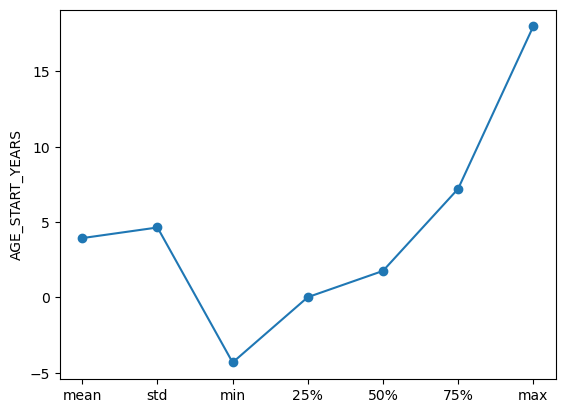

In [4]:
allergy_df.describe().drop('count')['AGE_START_YEARS'].plot(marker='o')
plt.ylabel('AGE_START_YEARS')

In [5]:
allergy_df.describe().drop('count')['AGE_START_YEARS']

mean     3.942140
std      4.646174
min     -4.312115
25%      0.021903
50%      1.763176
75%      7.208761
max     17.984942
Name: AGE_START_YEARS, dtype: float64

In [6]:
df=allergy_df[allergy_df['AGE_START_YEARS']<0]
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
29886,29887,2008,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,-0.971937,2.683094,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74892,74893,2009,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,-0.180698,3.865845,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86069,86070,2010,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,False,-0.128679,3.258042,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.464066,3.258042,2.0
90009,90010,2010,S0 - Male,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,False,-0.104038,3.255305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102876,102877,2011,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,-0.027379,2.540726,NaN,...,NaN,NaN,NaN,NaN,NaN,1.002053,NaN,1.029432,2.787132,11.0


In [7]:
allergy_df.dtypes

SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
AGE_END_YEARS              float64
SHELLFISH_ALG_START        float64
SHELLFISH_ALG_END          float64
FISH_ALG_START             float64
FISH_ALG_END               float64
MILK_ALG_START             float64
MILK_ALG_END               float64
SOY_ALG_START              float64
SOY_ALG_END                float64
EGG_ALG_START              float64
EGG_ALG_END                float64
WHEAT_ALG_START            float64
WHEAT_ALG_END              float64
PEANUT_ALG_START           float64
PEANUT_ALG_END             float64
SESAME_ALG_START           float64
SESAME_ALG_END             float64
TREENUT_ALG_START          float64
TREENUT_ALG_END            float64
WALNUT_ALG_START           float64
WALNUT_ALG_END      

In [8]:
allergy_df.columns


Index(['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END', 'FIRST_ASTHMARX', 'L

In [9]:
#Clean data and copy it in the allallergy_df_clean dataframe
allergy_df_clean=allergy_df.copy()

#select all the numeric columns 
numeric_col=allergy_df.describe().columns

deleted_rows_count=0
data_err_number=0

#check if any data in the numeric cols is negative
#then delete the rows with negative values

for col in numeric_col:
    data_err_number= len(allergy_df_clean[allergy_df_clean[col] < 0])
    if (data_err_number > 0):
        print(f'{data_err_number} negative values were removed from {col} column')
        allergy_df_clean=allergy_df_clean.drop(allergy_df_clean[allergy_df_clean[col] < 0].index)
        deleted_rows_count+=data_err_number

print(f'\n------ {deleted_rows_count} rows deleted. --------')
allergy_df_clean.head()

25 negative values were removed from AGE_START_YEARS column
6 negative values were removed from MILK_ALG_START column
1 negative values were removed from SOY_ALG_START column
3 negative values were removed from EGG_ALG_START column
10 negative values were removed from ATOPIC_DERM_START column
8 negative values were removed from ALLERGIC_RHINITIS_START column

------ 53 rows deleted. --------


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

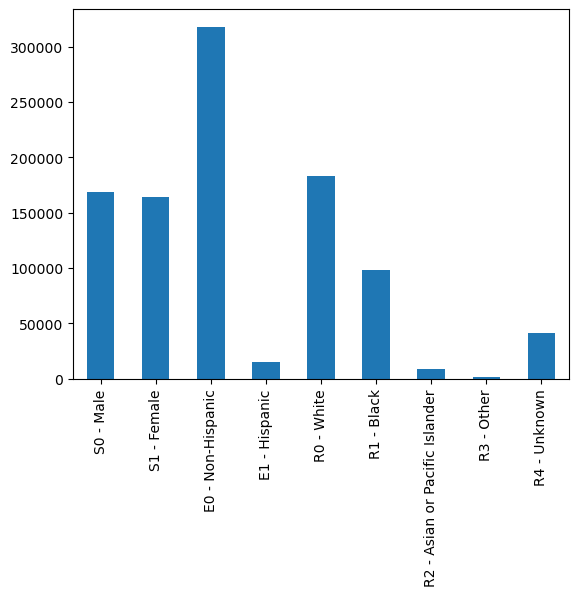

In [10]:
pd.concat([allergy_df_clean.groupby('GENDER_FACTOR').count(),
          allergy_df_clean.groupby('ETHNICITY_FACTOR').count(),
          allergy_df_clean.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar")

<AxesSubplot: xlabel='GENDER_FACTOR,ETHNICITY_FACTOR'>

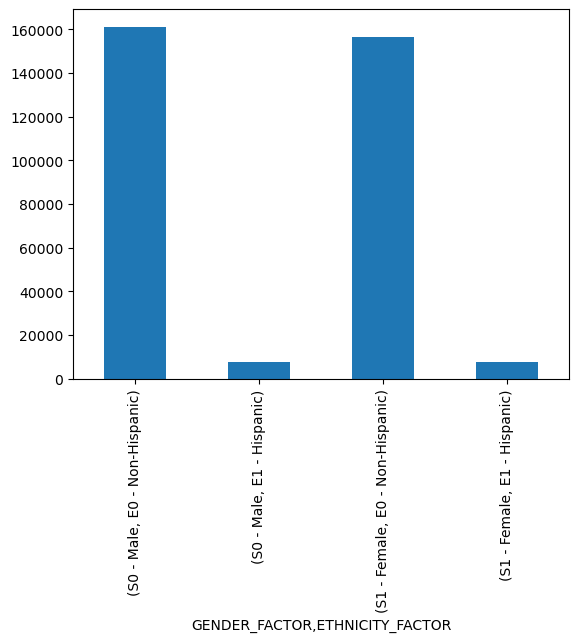

In [11]:
(allergy_df_clean.groupby(['GENDER_FACTOR','ETHNICITY_FACTOR']).count()['RACE_FACTOR']).plot(kind="bar")

<AxesSubplot: xlabel='GENDER_FACTOR,RACE_FACTOR'>

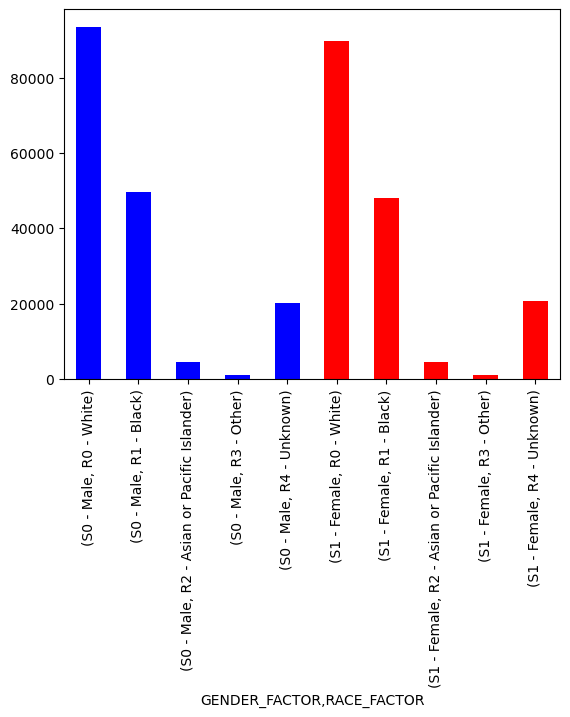

In [12]:
(allergy_df_clean.groupby(['GENDER_FACTOR','RACE_FACTOR']).count()['ETHNICITY_FACTOR']).plot(kind="bar",color=['blue','blue','blue','blue','blue',
                                                                                                         'red','red','red','red','red','red'])

In [13]:
#add column for age bins
allergy_df_clean['AGE_BIN'] = ''

#fill out age bins based on age start
allergy_df_clean['AGE_BIN'][allergy_df_clean["AGE_START_YEARS"] < 1] = 'A0-Infant'
allergy_df_clean['AGE_BIN'][(1 <= allergy_df_clean["AGE_START_YEARS"]) & (allergy_df_clean["AGE_START_YEARS"] < 3)] = 'A1-Toddler'
allergy_df_clean['AGE_BIN'][(3 <= allergy_df_clean["AGE_START_YEARS"]) & (allergy_df_clean["AGE_START_YEARS"] < 5)] = 'A2-Preschool'
allergy_df_clean['AGE_BIN'][(5 <= allergy_df_clean["AGE_START_YEARS"]) & (allergy_df_clean["AGE_START_YEARS"] < 13)] = 'A3-Grade School'
allergy_df_clean['AGE_BIN'][allergy_df_clean["AGE_START_YEARS"] >= 13] = 'A4-Highschool'

C:\Users\LTabl\AppData\Local\Temp\ipykernel_20956\1326792729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allergy_df_clean['AGE_BIN'][allergy_df_clean["AGE_START_YEARS"] < 1] = 'A0-Infant'
C:\Users\LTabl\AppData\Local\Temp\ipykernel_20956\1326792729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allergy_df_clean['AGE_BIN'][(1 <= allergy_df_clean["AGE_START_YEARS"]) & (allergy_df_clean["AGE_START_YEARS"] < 3)] = 'A1-Toddler'
C:\Users\LTabl\AppData\Local\Temp\ipykernel_20956\1326792729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [14]:
allergy_df_clean.groupby('AGE_BIN').count()['SUBJECT_ID']

AGE_BIN
A0-Infant          150165
A1-Toddler          36834
A2-Preschool        32010
A3-Grade School     95248
A4-Highschool       18890
Name: SUBJECT_ID, dtype: int64

In [15]:
def get_allergen_df(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df_clean[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column, 'AGE_BIN']].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    value = allergen_df_clean[allergen_df_clean[allergen_end_column].isna()][allergen_start_column]

    #for index in value.index:
        #allergen_df_clean.iloc[index,10]=value[index]
    return allergen_df_clean


In [16]:
#retrieve dataframe for patients with antibody response to milk
milk_df_clean=get_allergen_df('milk')
milk_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END,AGE_BIN
0,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,1.002053,1.002053,A0-Infant
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.421629,5.133470,0.544832,0.544832,A0-Infant
2,139,1999,S0 - Male,R0 - White,E0 - Non-Hispanic,P1 - Medicaid,False,7.671458,14.592745,7.671458,7.671458,A3-Grade School
3,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.016427,6.855578,0.334018,0.334018,A0-Infant
4,214,2006,S0 - Male,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.079398,6.965092,0.123203,NaN,A0-Infant


In [17]:
milk_df_clean.count()

SUBJECT_ID             7279
BIRTH_YEAR             7279
GENDER_FACTOR          7279
RACE_FACTOR            7279
ETHNICITY_FACTOR       7279
PAYER_FACTOR           7279
ATOPIC_MARCH_COHORT    7279
AGE_START_YEARS        7279
AGE_END_YEARS          7279
MILK_ALG_START         7279
MILK_ALG_END           4573
AGE_BIN                7279
dtype: int64

In [18]:
#milk_scatter_df = milk_df_clean.groupby('GENDER_FACTOR')
#milk_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="MILK_ALG_START", grid=True, edgecolors="black")
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, annotate_xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values, marker="o", facecolors="lightskyblue", edgecolors="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")

The r-value is: 0.8453348158418111


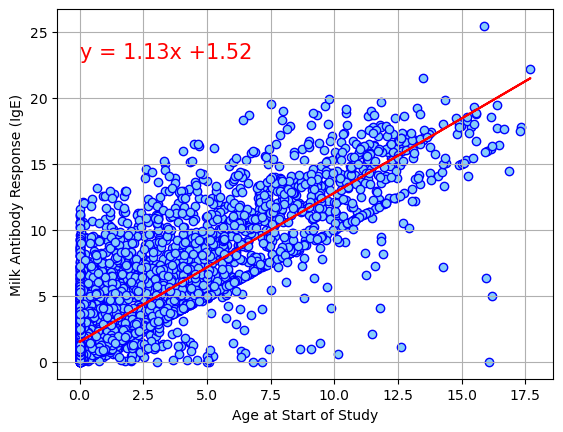

In [19]:
#find correlation between Milk Antibody Response and patient's Age at start of study
createLinearRegressionPlot(milk_df_clean["AGE_START_YEARS"], milk_df_clean["MILK_ALG_START"], "Age at Start of Study", "Milk Antibody Response (IgE)",(0,23))
plt.savefig("Images/milk_response_and_age_correlation.png")
plt.show()

The r-value is: -0.8306979666422377


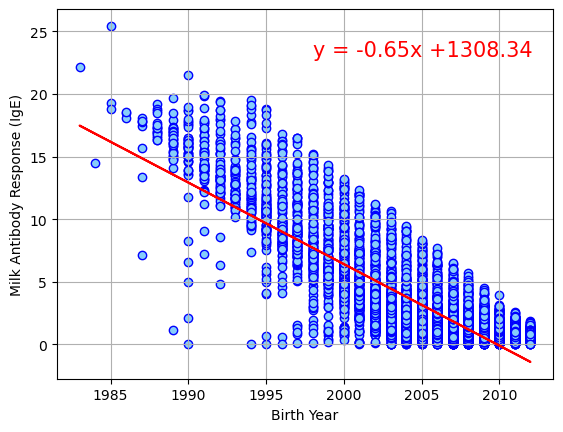

In [20]:
#find correlation between Milk Antibody Response and patient's Birth Year
createLinearRegressionPlot(milk_df_clean["BIRTH_YEAR"], milk_df_clean["MILK_ALG_START"], "Birth Year", "Milk Antibody Response (IgE)",(1998,23))
plt.savefig("Images/milkresponse_and_birthyear_correlation.png")
plt.show()

In [21]:
milk_df_clean['AGE_START_YEARS'].describe()

count    7279.000000
mean        1.576590
std         3.021897
min         0.000000
25%         0.016427
50%         0.038330
75%         1.531828
max        17.700205
Name: AGE_START_YEARS, dtype: float64

<AxesSubplot: xlabel='GENDER_FACTOR,ETHNICITY_FACTOR'>

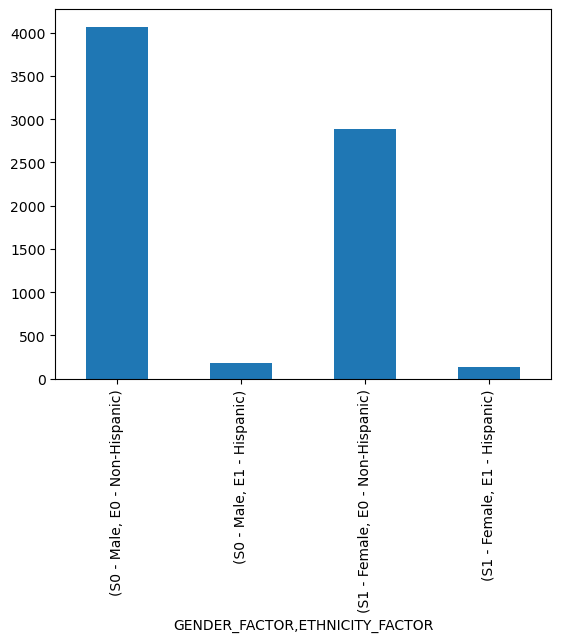

In [22]:
(milk_df_clean.groupby(['GENDER_FACTOR','ETHNICITY_FACTOR']).count()['RACE_FACTOR']).plot(kind="bar")

In [23]:
milk_df_clean['RACE_FACTOR'].unique()

array(['R0 - White', 'R1 - Black', 'R2 - Asian or Pacific Islander',
       'R4 - Unknown', 'R3 - Other'], dtype=object)

<AxesSubplot: xlabel='RACE_FACTOR'>

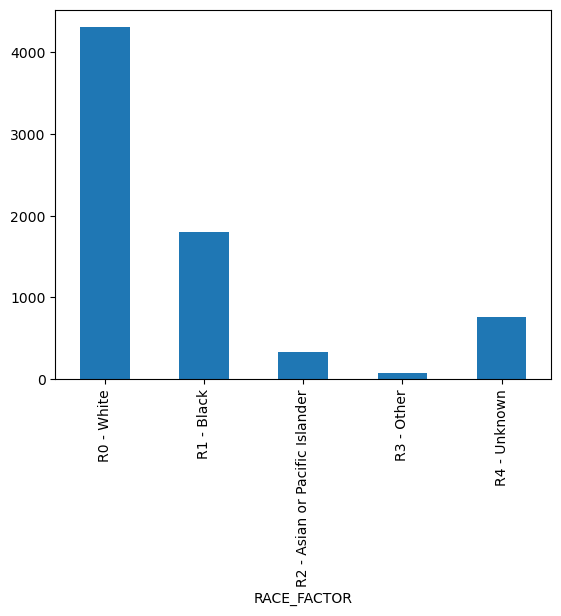

In [24]:
(milk_df_clean.groupby('RACE_FACTOR').count()['SUBJECT_ID']).plot(kind="bar")

In [25]:
milk_race_unknown = milk_df_clean.loc[milk_df_clean["RACE_FACTOR"] == "R4 - Unknown"]
milk_race_unknown

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END,AGE_BIN
38,4422,1994,S0 - Male,R4 - Unknown,E1 - Hispanic,P1 - Medicaid,False,7.501711,16.202601,19.534565,NaN,A3-Grade School
39,4524,1996,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.316906,17.845311,6.606434,6.606434,A3-Grade School
44,4677,1997,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P1 - Medicaid,False,4.295688,9.086927,13.065024,NaN,A2-Preschool
45,4808,1996,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.180014,16.772074,12.410678,NaN,A3-Grade School
60,6523,1996,S0 - Male,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.023956,12.662560,9.963039,NaN,A3-Grade School
...,...,...,...,...,...,...,...,...,...,...,...,...
7240,331947,2006,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.021903,7.129363,2.017796,NaN,A0-Infant
7245,332164,2006,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P1 - Medicaid,False,0.427105,6.620123,1.456537,1.456537,A0-Infant
7268,332771,2006,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.019165,6.119097,1.015743,1.015743,A0-Infant
7270,332843,2006,S0 - Male,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.024641,7.055441,1.251198,1.251198,A0-Infant


In [26]:
milk_infant = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A0-Infant']
milk_toddler = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A1-Toddler']
milk_preschool = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A2-Preschool']
milk_gradeschool = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A3-Grade School']
milk_highschool = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A4-Highschool']

print(f"Total number of kids sensitive to milk: {len(milk_df_clean)}")
print(f"Number of infants sensitive to milk: {len(milk_infant)}")
print(f"Number of toddlers sensitive to milk: {len(milk_toddler)}")
print(f"Number of preschoolers sensitive to milk: {len(milk_preschool)}")
print(f"Number of grade schoolers (K-8) sensitive to milk: {len(milk_gradeschool)}")
print(f"Number of highschoolers sensitive to milk: {len(milk_highschool)}")

Total number of kids sensitive to milk: 7279
Number of infants sensitive to milk: 5088
Number of toddlers sensitive to milk: 888
Number of preschoolers sensitive to milk: 425
Number of grade schoolers (K-8) sensitive to milk: 802
Number of highschoolers sensitive to milk: 76


In [27]:
study_infant = allergy_df_clean.loc[allergy_df_clean['AGE_BIN'] == 'A0-Infant']
study_toddler = allergy_df_clean.loc[allergy_df_clean['AGE_BIN'] == 'A1-Toddler']
study_preschool = allergy_df_clean.loc[allergy_df_clean['AGE_BIN'] == 'A2-Preschool']
study_gradeschool = allergy_df_clean.loc[allergy_df_clean['AGE_BIN'] == 'A3-Grade School']
study_highschool = allergy_df_clean.loc[allergy_df_clean['AGE_BIN'] == 'A4-Highschool']

print(f"Total number of kids in study: {len(allergy_df_clean)}")
print(f"Number of infants in study: {len(study_infant)}")
print(f"Number of toddlers in study: {len(study_toddler)}")
print(f"Number of preschoolers in study: {len(study_preschool)}")
print(f"Number of grade school kids (K-8) in study: {len(study_gradeschool)}")
print(f"Number of highschoolers in study: {len(study_highschool)}")

Total number of kids in study: 333147
Number of infants in study: 150165
Number of toddlers in study: 36834
Number of preschoolers in study: 32010
Number of grade school kids (K-8) in study: 95248
Number of highschoolers in study: 18890


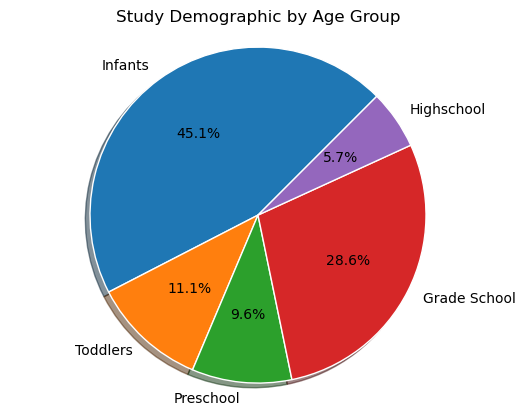

In [28]:
plt.title("Study Demographic by Age Group")
age_bins = ["Infants", "Toddlers", "Preschool", "Grade School", "Highschool"]
kids_in_study = [len(study_infant), len(study_toddler), len(study_preschool), len(study_gradeschool), len(study_highschool)]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0, 0, 0, 0, 0)
plt.pie(kids_in_study, explode=explode, labels=age_bins, 
        autopct="%1.1f%%", shadow=True, startangle=45, 
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True})
plt.axis("equal")
plt.savefig("Images/demographic_by_ages.png")
plt.show()

In [29]:
count_list=[]
mean_list=[]
max_list=[]
min_list=[]
percent_population_list=[]

allergen_stats=allergy_df_clean.describe()
total_subjects=allergy_df_clean.count()['SUBJECT_ID']

allergen_list=allergy_df_clean.columns[9:-9]
allergen_list=[x for x in allergen_list if 'ALG_START' in x]

for x in allergen_list:
    count=allergen_stats.loc['count',x]
    count_list.append(count)
    mean=round(allergen_stats.loc['mean',x],2)
    mean_list.append(mean)
    max_num = round(allergen_stats.loc['max',x],2)
    max_list.append(max_num)
    min_num = round(allergen_stats.loc['min',x],2)
    min_list.append(min_num)
    pop_percent=(allergen_stats.loc['count',x]/total_subjects*100).round(2).astype(str)+'%'
    percent_population_list.append(pop_percent)

allergy_response_df=pd.DataFrame(data={'Count':count_list,
                                       'Mean':mean_list,
                                       'Max':max_list,
                                       'Min':min_list,
                                       'Percent of Population':percent_population_list},
                                 index=[allergen_name[:-10] for allergen_name in allergen_list])

print('\n----------------------------------')
print('---- Allergy Response Summary -----')
print('----------------------------------')
allergy_response_df.index.names=['Allergen']
allergy_response_df.sort_values(by=['Count','Mean'],ascending=False)


----------------------------------
---- Allergy Response Summary -----
----------------------------------


,Count,Mean,Max,Min,Percent of Population
Allergen,,,,,
PEANUT,8650.0,5.03,21.52,0.00,2.6%
MILK,7279.0,3.30,25.43,0.00,2.18%
EGG,6057.0,3.29,22.16,0.00,1.82%
SHELLFISH,5246.0,8.72,24.30,0.09,1.57%
SOY,2416.0,3.96,24.22,0.03,0.73%
FISH,1795.0,6.63,22.50,0.08,0.54%
WHEAT,1144.0,4.55,22.84,0.16,0.34%
SESAME,765.0,6.13,22.72,0.49,0.23%
WALNUT,704.0,7.60,20.05,0.34,0.21%


In [30]:
#create the race summary
race_df=pd.DataFrame(allergy_df_clean.groupby('RACE_FACTOR').count()['SUBJECT_ID'])
race_df.columns=['Total Participants']
race_df.index.names=['Race']
race_df

,Total Participants
Race,
R0 - White,183276
R1 - Black,97781
R2 - Asian or Pacific Islander,9148
R3 - Other,2005
R4 - Unknown,40937


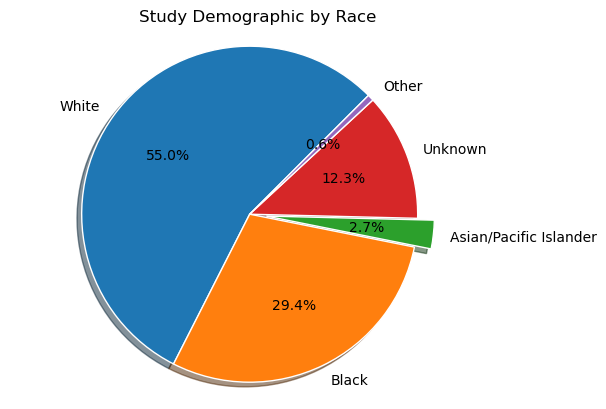

In [31]:
plt.title("Study Demographic by Race")
races = ["White", "Black", "Asian/Pacific Islander", "Unknown", "Other"]
subjects = [183276, 97781, 9148, 40937, 2005]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0, 0, 0.1, 0, 0)
plt.pie(subjects, explode=explode, labels=races, 
        autopct="%1.1f%%", shadow=True, startangle=45, 
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True})
plt.axis("equal")
plt.savefig("Images/demographic_by_race.png")
plt.show()

In [32]:
total_white = allergy_df_clean[allergy_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']
white_percentage = round(total_white/total_subjects*100,2)
total_black = allergy_df_clean[allergy_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']
black_percentage = round(total_black/total_subjects*100,2)
total_asian = allergy_df_clean[allergy_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']
asian_percentage = round(total_asian/total_subjects*100,2)
total_other = allergy_df_clean[allergy_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']
other_percentage = round(total_other/total_subjects*100,2)
total_unknown = allergy_df_clean[allergy_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']
unknown_percentage = round(total_unknown/total_subjects*100,2)
print('----   Race Summary  ----')
print (f'Total Participants : {total_subjects}')
print('-'*35)
print (f'Total number of White Participants : {total_white}')
print (f'Percentage of White Participants : {white_percentage}%')
print('-'*35)
print (f'Total number of Black Participants : {total_black}')
print (f'Percentage of Black Participants : {black_percentage}%')
print('-'*35)
print (f'Total number of Asian or Pacific Islander Participants : {total_asian}')
print (f'Percentage of Asian or Pacific Islander Participants : {asian_percentage}%')
print('-'*35)
print (f'Total number of Other Race Participants : {total_other}')
print (f'Percentage of Other Race Participants : {other_percentage}%')
print('-'*35)
print (f'Total number of Unknown Race Participants : {total_unknown}')
print (f'Percentage of Unknown Race Participants : {unknown_percentage}%')


----   Race Summary  ----
Total Participants : 333147
-----------------------------------
Total number of White Participants : 183276
Percentage of White Participants : 55.01%
-----------------------------------
Total number of Black Participants : 97781
Percentage of Black Participants : 29.35%
-----------------------------------
Total number of Asian or Pacific Islander Participants : 9148
Percentage of Asian or Pacific Islander Participants : 2.75%
-----------------------------------
Total number of Other Race Participants : 2005
Percentage of Other Race Participants : 0.6%
-----------------------------------
Total number of Unknown Race Participants : 40937
Percentage of Unknown Race Participants : 12.29%


In [33]:
percentages = [white_percentage, black_percentage, asian_percentage, other_percentage, unknown_percentage]
race_df["Total Participant %"] = percentages
race_df["Total Participant %"] = race_df["Total Participant %"].map("{:,.2f}%".format)
race_df

,Total Participants,Total Participant %
Race,,
R0 - White,183276,55.01%
R1 - Black,97781,29.35%
R2 - Asian or Pacific Islander,9148,2.75%
R3 - Other,2005,0.60%
R4 - Unknown,40937,12.29%


In [34]:
peanut_df_clean = get_allergen_df('peanut')
egg_df_clean = get_allergen_df('egg')
shellfish_df_clean = get_allergen_df('shellfish')
soy_df_clean = get_allergen_df('soy')
fish_df_clean = get_allergen_df('fish')
wheat_df_clean = get_allergen_df('wheat')

In [35]:
#get stats for peanut allergy by race
peanut_white = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
peanut_black = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
peanut_asian = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
peanut_other = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
peanut_unknown = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
peanut_percentages = [peanut_white,peanut_black,peanut_asian,peanut_other,peanut_unknown]

In [36]:
#get stats for milk allergy by race
milk_white = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
milk_black = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
milk_asian = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
milk_other = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
milk_unknown = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
milk_percentages = [milk_white,milk_black,milk_asian,milk_other,milk_unknown]

In [37]:
#get stats for egg allergy by race
egg_white = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
egg_black = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
egg_asian = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
egg_other = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
egg_unknown = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
egg_percentages = [egg_white,egg_black,egg_asian,egg_other,egg_unknown]

In [38]:
#get stats for shellfish allergy by race
shellfish_white = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
shellfish_black = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
shellfish_asian = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
shellfish_other = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
shellfish_unknown = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
shellfish_percentages = [shellfish_white,shellfish_black,shellfish_asian,shellfish_other,shellfish_unknown]

In [39]:
#get stats for soy  by race
soy_white = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
soy_black = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
soy_asian = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
soy_other = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
soy_unknown = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
soy_percentages = [soy_white,soy_black,soy_asian,soy_other,soy_unknown]

In [40]:
#get stats for fish by race
fish_white = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
fish_black = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
fish_asian = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
fish_other = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
fish_unknown = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
fish_percentages = [fish_white,fish_black,fish_asian,fish_other,fish_unknown]

In [41]:
#get stats for wheat by race
wheat_white = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
wheat_black = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
wheat_asian = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
wheat_other = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
wheat_unknown = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
wheat_percentages = [wheat_white,wheat_black,wheat_asian,wheat_other,wheat_unknown]

In [42]:
race_df["Peanut Allergy %"] = peanut_percentages
race_df["Milk Allergy %"] = milk_percentages
race_df["Egg Allergy %"] = egg_percentages
race_df["Shellfish Allergy %"] = shellfish_percentages
race_df["Soy Allergy %"] = soy_percentages
race_df["Fish Allergy %"] = fish_percentages
race_df["Wheat Allergy %"] = wheat_percentages

race_df

,Total Participants,Total Participant %,Peanut Allergy %,Milk Allergy %,Egg Allergy %,Shellfish Allergy %,Soy Allergy %,Fish Allergy %,Wheat Allergy %
Race,,,,,,,,,
R0 - White,183276,55.01%,2.52,2.35,1.82,0.86,0.80,0.29,0.34
R1 - Black,97781,29.35%,2.73,1.84,1.53,3.00,0.58,0.99,0.32
R2 - Asian or Pacific Islander,9148,2.75%,5.44,3.65,5.26,3.19,1.54,1.37,0.96
R3 - Other,2005,0.60%,2.94,3.54,2.84,1.20,1.40,0.65,0.45
R4 - Unknown,40937,12.29%,1.95,1.87,1.67,1.02,0.53,0.39,0.29


In [43]:
allergy_chart_df = race_df.drop(columns=['Total Participants', 'Total Participant %'])
allergy_chart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, R0 - White to R4 - Unknown
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Peanut Allergy %     5 non-null      float64
 1   Milk Allergy %       5 non-null      float64
 2   Egg Allergy %        5 non-null      float64
 3   Shellfish Allergy %  5 non-null      float64
 4   Soy Allergy %        5 non-null      float64
 5   Fish Allergy %       5 non-null      float64
 6   Wheat Allergy %      5 non-null      float64
dtypes: float64(7)
memory usage: 320.0+ bytes


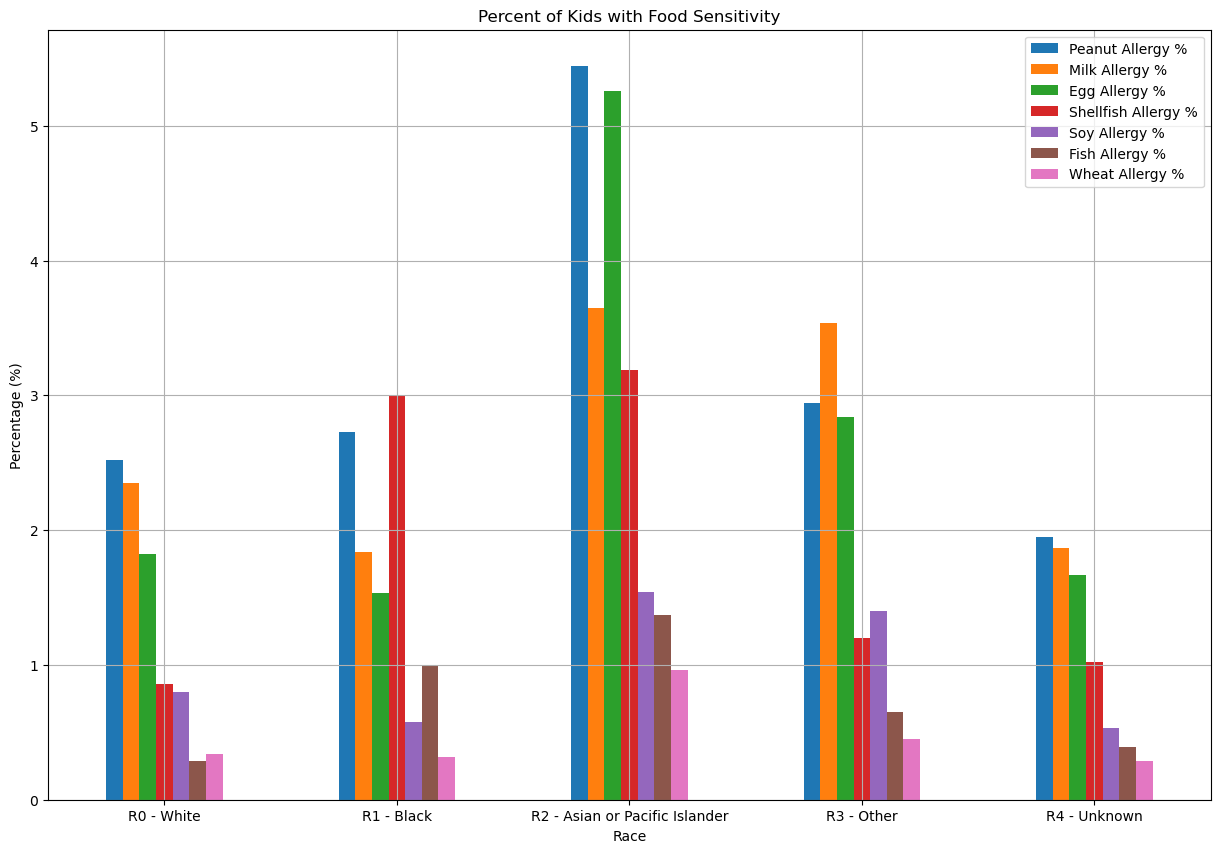

In [44]:
multi_plot = allergy_chart_df.plot(kind="bar", align = "center", figsize=(15,10))
xticklabels = allergy_chart_df.index
multi_plot.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

plt.title("Percent of Kids with Food Sensitivity")
plt.xlabel("Race")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig("Images/percent_by_race.png")

plt.show()

In [45]:
#get stats for peanut allergy by age bin
peanut_infant = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
peanut_toddler = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
peanut_preschool = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
peanut_gradeschool = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
peanut_highschool = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
peanut_stat = [peanut_infant,peanut_toddler,peanut_preschool,peanut_gradeschool,peanut_highschool]

In [46]:
#get stats for milk allergy by age bin
milk_infant_stat = round(len(milk_infant)/len(study_infant)*100,2)
milk_toddler_stat = round(len(milk_toddler)/len(study_toddler)*100,2)
milk_preschool_stat = round(len(milk_preschool)/len(study_preschool)*100,2)
milk_gradeschool_stat = round(len(milk_gradeschool)/len(study_gradeschool)*100,2)
milk_highschool_stat = round(len(milk_highschool)/len(study_highschool)*100,2)
milk_stat = [milk_infant_stat,milk_toddler_stat,milk_preschool_stat,milk_gradeschool_stat,milk_highschool_stat]

In [47]:
#get stats for egg allergy by age bin
egg_infant = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
egg_toddler = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
egg_preschool = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
egg_gradeschool = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
egg_highschool = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
egg_stat = [egg_infant,egg_toddler,egg_preschool,egg_gradeschool,egg_highschool]

In [48]:
#get stats for shellfish allergy by age bin
shellfish_infant = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
shellfish_toddler = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
shellfish_preschool = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
shellfish_gradeschool = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
shellfish_highschool = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
shellfish_stat = [shellfish_infant,shellfish_toddler,shellfish_preschool,shellfish_gradeschool,shellfish_highschool]

In [49]:
#get stats for soy allergy by age bin
soy_infant = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
soy_toddler = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
soy_preschool = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
soy_gradeschool = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
soy_highschool = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
soy_stat = [soy_infant,soy_toddler,soy_preschool,soy_gradeschool,soy_highschool]

In [50]:
#get stats for fish allergy by age bin
fish_infant = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
fish_toddler = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
fish_preschool = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
fish_gradeschool = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
fish_highschool = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
fish_stat = [fish_infant,fish_toddler,fish_preschool,fish_gradeschool,fish_highschool]

In [51]:
#get stats for wheat allergy by age bin
wheat_infant = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
wheat_toddler = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
wheat_preschool = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
wheat_gradeschool = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
wheat_highschool = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
wheat_stat = [wheat_infant,wheat_toddler,wheat_preschool,wheat_gradeschool,wheat_highschool]

In [52]:
age_df=pd.DataFrame(allergy_df_clean.groupby('AGE_BIN').count()['SUBJECT_ID'])
age_df.columns=['Total Participants']
age_df.index.names=['Age Bin']
age_df

,Total Participants
Age Bin,
A0-Infant,150165
A1-Toddler,36834
A2-Preschool,32010
A3-Grade School,95248
A4-Highschool,18890


In [53]:
age_df["Total Participant %"]=allergy_df_clean.AGE_BIN.value_counts(normalize=True)*100
age_df["Peanut Allergy %"] = peanut_stat
age_df["Milk Allergy %"] = milk_stat
age_df["Egg Allergy %"] = egg_stat
age_df["Shellfish Allergy %"] = shellfish_stat
age_df["Soy Allergy %"] = soy_stat
age_df["Fish Allergy %"] = fish_stat
age_df["Wheat Allergy %"] = wheat_stat
age_df

,Total Participants,Total Participant %,Peanut Allergy %,Milk Allergy %,Egg Allergy %,Shellfish Allergy %,Soy Allergy %,Fish Allergy %,Wheat Allergy %
Age Bin,,,,,,,,,
A0-Infant,150165,45.074697,3.21,3.39,2.76,1.31,1.09,0.56,0.46
A1-Toddler,36834,11.056381,3.52,2.41,2.43,1.80,0.85,0.74,0.48
A2-Preschool,32010,9.608371,2.35,1.33,1.12,1.59,0.43,0.45,0.27
A3-Grade School,95248,28.590382,1.70,0.84,0.63,1.86,0.31,0.48,0.18
A4-Highschool,18890,5.670170,0.89,0.40,0.28,1.73,0.19,0.42,0.10


In [54]:
age_chart_df = age_df.drop(columns=['Total Participants', 'Total Participant %'])

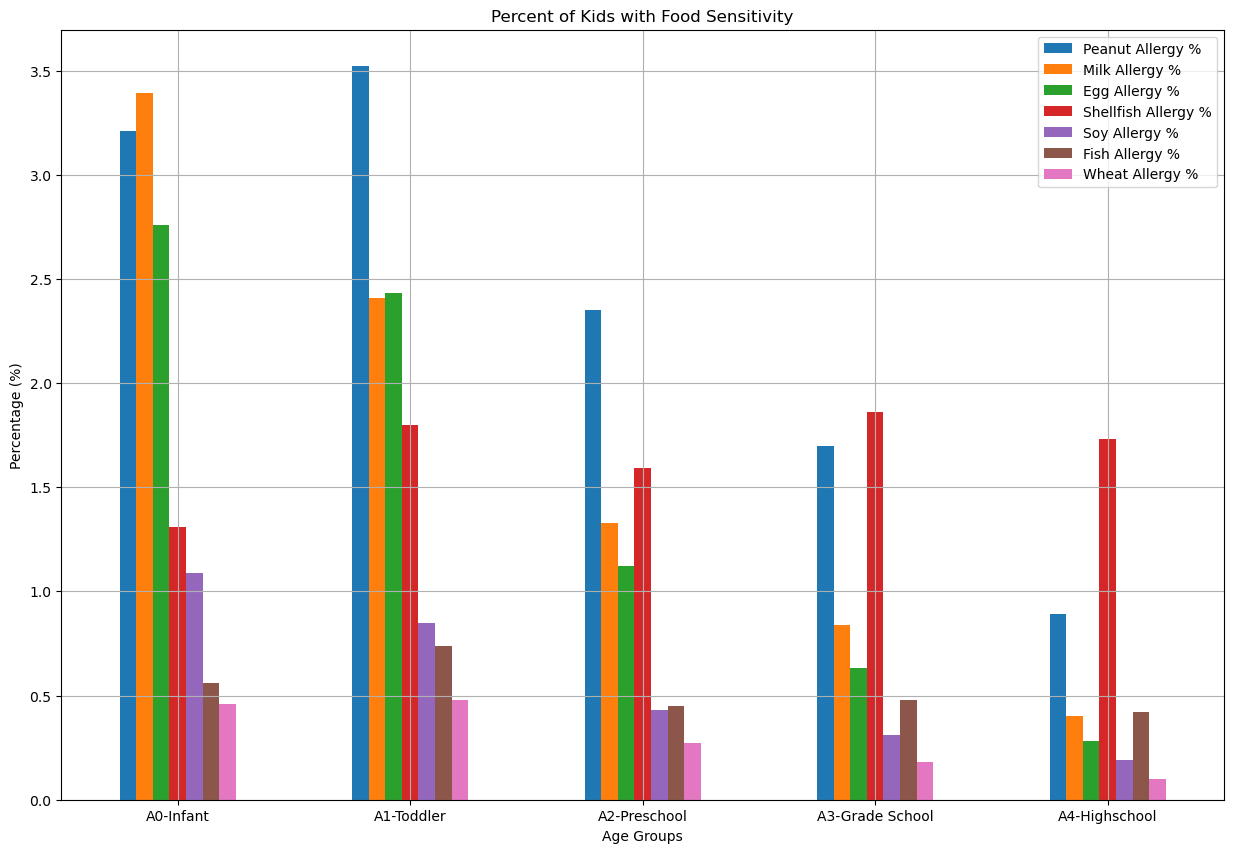

In [55]:
age_plot = age_chart_df.plot(kind="bar", align = "center", figsize=(15,10))
xticklabels = age_chart_df.index
age_plot.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

plt.title("Percent of Kids with Food Sensitivity")
plt.xlabel("Age Groups")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig("Images/percent_by_age.png")

plt.show()

In [58]:
#create same graph for gender. first get total number of males/females
study_male = allergy_df_clean.loc[allergy_df_clean['GENDER_FACTOR'] == 'S0 - Male']
study_female = allergy_df_clean.loc[allergy_df_clean['GENDER_FACTOR'] == 'S1 - Female']

print('----   Gender Summary  ----')
print (f'Total number of Male Participants : {len(study_male)}')
print (f'Total number of Female Participants : {len(study_female)}')

----   Gender Summary  ----
Total number of Male Participants : 169000
Total number of Female Participants : 164147


In [59]:
#get stats for peanut allergy by gender
peanut_male = round(peanut_df_clean[peanut_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
peanut_female = round(peanut_df_clean[peanut_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
peanut_gender = [peanut_male,peanut_female]

In [60]:
#get stats for milk allergy by gender
milk_male = round(milk_df_clean[milk_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
milk_female = round(milk_df_clean[milk_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
milk_gender = [milk_male,milk_female]

In [61]:
#get stats for egg allergy by gender
egg_male = round(egg_df_clean[egg_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
egg_female = round(egg_df_clean[egg_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
egg_gender = [egg_male,egg_female]

In [62]:
#get stats for shellfish allergy by gender
shellfish_male = round(shellfish_df_clean[shellfish_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
shellfish_female = round(shellfish_df_clean[shellfish_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
shellfish_gender = [shellfish_male,shellfish_female]

In [63]:
#get stats for soy allergy by gender
soy_male = round(soy_df_clean[soy_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
soy_female = round(soy_df_clean[soy_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
soy_gender = [soy_male,soy_female]

In [64]:
#get stats for fish allergy by gender
fish_male = round(fish_df_clean[fish_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
fish_female = round(fish_df_clean[fish_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
fish_gender = [fish_male,fish_female]

In [65]:
#get stats for wheat allergy by gender
wheat_male = round(wheat_df_clean[wheat_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
wheat_female = round(wheat_df_clean[wheat_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
wheat_gender = [wheat_male,wheat_female]

In [66]:
gender_df=pd.DataFrame(allergy_df_clean.groupby('GENDER_FACTOR').count()['SUBJECT_ID'])
gender_df.columns=['Total Participants']
gender_df.index.names=['Gender']
gender_df

,Total Participants
Gender,
S0 - Male,169000
S1 - Female,164147


In [67]:
gender_df["Peanut Allergy %"] = peanut_gender
gender_df["Milk Allergy %"] = milk_gender
gender_df["Egg Allergy %"] = egg_gender
gender_df["Shellfish Allergy %"] = shellfish_gender
gender_df["Soy Allergy %"] = soy_gender
gender_df["Fish Allergy %"] = fish_gender
gender_df["Wheat Allergy %"] = wheat_gender
gender_df

,Total Participants,Peanut Allergy %,Milk Allergy %,Egg Allergy %,Shellfish Allergy %,Soy Allergy %,Fish Allergy %,Wheat Allergy %
Gender,,,,,,,,
S0 - Male,169000,3.07,2.52,2.22,1.67,0.88,0.62,0.44
S1 - Female,164147,2.11,1.84,1.41,1.47,0.56,0.46,0.24


In [68]:
gender_chart_df = gender_df.drop(columns=['Total Participants'])

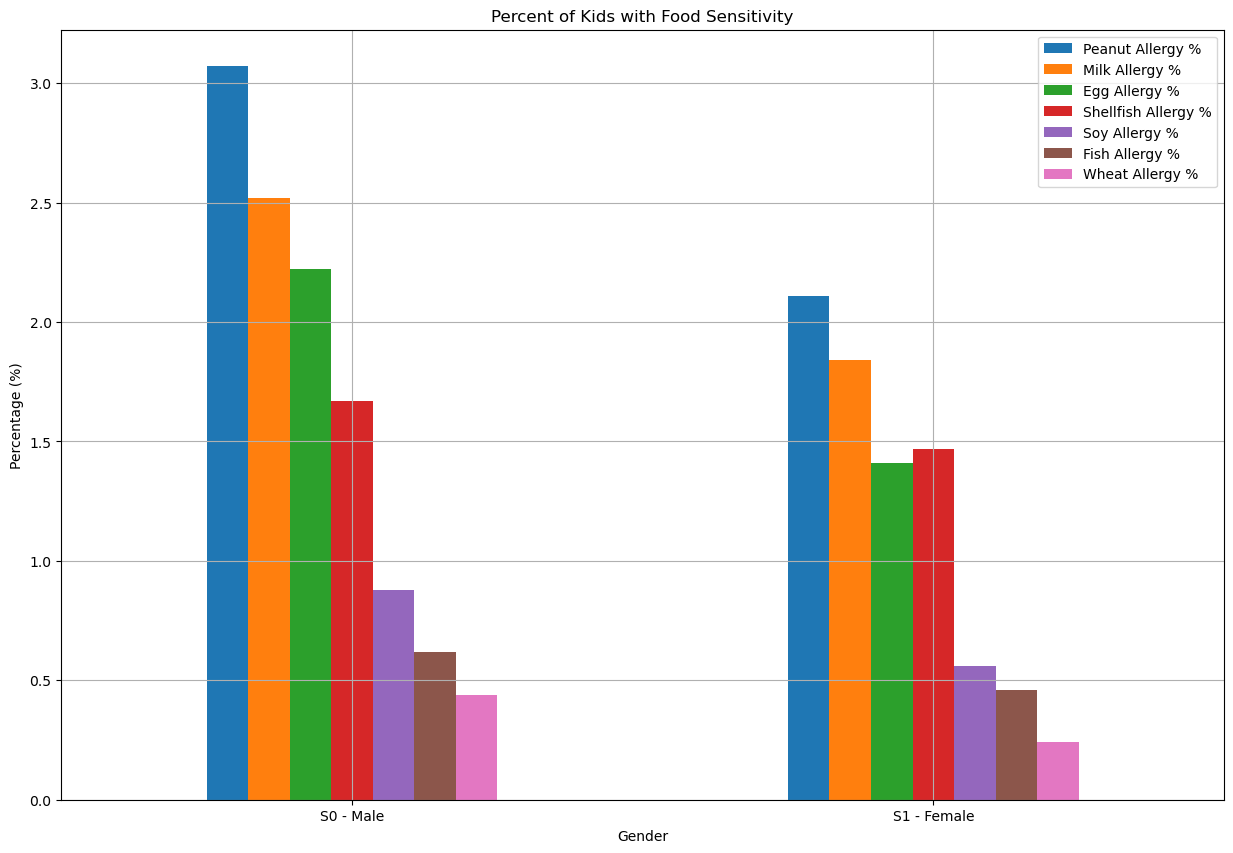

In [69]:
gender_plot = gender_chart_df.plot(kind="bar", align = "center", figsize=(15,10))
xticklabels = gender_chart_df.index
gender_plot.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

plt.title("Percent of Kids with Food Sensitivity")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig("Images/percent_by_gender.png")

plt.show()